<a href="https://colab.research.google.com/github/lizzzb/MovieLens-Data-Analysis-in-Python/blob/main/TheoryRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content-based Filtering Solutions

##Gradient Boosting Trees

#### Leveraging User and Item Features
In recommendation systems, user and item features are critical inputs that help tailor suggestions to individual preferences. User features might include demographic information (age, location, preferences) and behavioral data (past purchases, browsing history). Item features could encompass attributes such as genre, price, or specifications. By analyzing these features, a recommendation system can generate personalized suggestions, improving user engagement and satisfaction.

#### What Are Gradient-Boosting Trees?
Gradient-boosting trees are a machine learning technique that aggregates multiple decision trees to enhance predictive accuracy. Each tree corrects the errors of its predecessors, resulting in a robust ensemble model. The term "boosting" refers to the method of sequentially training models where each new model focuses on the errors made by the previous ones. This approach is particularly effective for tabular data, where relationships between features can be complex and nonlinear.

#### Loss Function and Taylor Expansion
In machine learning, the loss function quantifies how well the model's predictions align with the actual values. In gradient boosting, the model optimizes this loss by making small adjustments based on the residual errors (differences between predicted and actual values). The Taylor expansion approximates the loss function using derivatives, which simplifies the calculation. By using the first derivative (gradient) and second derivative (Hessian), we can derive a more manageable approximation that retains essential information about the function's shape.

#### Tree Growth Strategies
- **Level-Wise Strategy:** This method constructs trees level by level, starting from the root and expanding outward. It is straightforward and works well for smaller datasets where complex interactions between features are minimal. However, it can be less efficient for larger datasets since it may not capture the subtleties in the data.

- **Leaf-Wise Strategy:** This approach focuses on optimizing the splits that lead to the greatest reduction in loss. By growing the tree leaf by leaf and prioritizing the most significant changes in loss, it can capture more intricate relationships in larger datasets. This method typically results in deeper trees that are better suited for complex data.

#### Computational Challenges
The main challenge in training gradient-boosting trees lies in determining the best split for each decision node. The **exact split** method, which evaluates every possible split for a given feature, can be computationally expensive, especially with large datasets. The processing time increases significantly with the number of data points and potential splits.

#### Histogram Approximation
To address the computational burden of finding optimal splits, histogram approximation reduces the number of evaluations needed. Instead of assessing every single value, the data is binned into discrete intervals (bins). For instance, a dataset with values ranging from 0 to 1 million can be grouped into a histogram with 100 bins. This simplification allows the algorithm to quickly compute potential splits based on aggregated data within each bin, significantly speeding up the training process without substantially sacrificing accuracy.

#### Conclusion
Gradient-boosting decision trees are highly effective for building recommendation systems due to their ability to model complex interactions between features and their robustness in handling large datasets.

# Evaluation of recommendation systems


Here’s a coherent summary of the information on evaluation metrics in recommender systems for your notes:

 In recommender systems (reco), we categorize metrics into three main families: **rating**, **ranking**, and **diversity**.

- **Rating Metrics** measure **how accurately a recommender predicts the exact interaction or rating a user would provide.** However, these metrics aren't always the best indicators of performance in real-world applications, such as media providers or e-commerce platforms.
-> exact interaction provided by user

- **Ranking Metrics** focus on **the relevance of the recommendations and their order.** **It's not just about recommending the right items but recommending them in the most useful sequence for the user. **These metrics are essential for real-world applications where ordering impacts the user experience.
-> provides the order

- **Diversity Metrics** evaluate **the novelty, diversity, or surprise factor in recommendations.** While important in some contexts, this course will focus on **rating** and **ranking** metrics, which are the most impactful for common industrial use cases.

#### Key Rating Metrics:

Regression Metrics:
- **RMSE (Root Mean Square Error)**: Measures the average error between predicted and actual ratings. It's a robust metric but can be sensitive to outliers.
- **MAE (Mean Absolute Error)**: Similar to RMSE, but it uses absolute values instead of squared differences, making it a better estimate of the true average error.

Classification Metrics:
- **AUC (Area Under the Curve)**: Useful for binary classifications (e.g., click or no-click scenarios). It evaluates the model's ability to discriminate between positive and negative classes. -> nice for click-rate
- **Log Loss**: Penalizes classifiers that are confident in incorrect classifications, making it useful for handling errors in probabilistic predictions.

#### Key Ranking Metrics:
Ranking metrics are particularly important in search and recommender systems.
- **Precision**: Measures the proportion of recommended items that are relevant. It evaluates how well the model correctly identifies relevant items. -> ability of the model to label a correct item as correct

- **Recall**: Measures the proportion of relevant items that are recommended. It evaluates how many of the total relevant items the model captures.
-> ability to capture ALL correct samples (TP TN)
- **NDCG (Normalized Discounted Cumulative Gain)**: Evaluates the effectiveness of ranking by considering both the relevance of items and their order.
- **MAP (Mean Average Precision)**: Measures the average precision for each user in the dataset, giving an overall picture of recommendation performance across all users.

Ranking metrics often appear as **@K**, such as **Precision@K** or **Recall@K**. This notation indicates that the metric is measured for the top **K** recommendations. For example, in e-commerce, you might evaluate how relevant the top five recommendations are, aiming for high precision and recall within that small set.

Benchmarking

  * Involves comparing your recommender system's performance against known standards or baselines.
  * Helps understand how your system stacks up against alternative approaches or established benchmarks.
  * Can use offline evaluation metrics (like RMSE or Precision@K discussed in your notes) on standard datasets.

A/B Testing

* A method for comparing two versions of a recommender system to see which performs better.
* Typically, you'll randomly split your users into two groups:
        * Group A: Receives recommendations from the existing system.
        * Group B: Receives recommendations from the new or modified system.
* Monitor key metrics (e.g., click-through rate, conversion rate) for each group.
* Statistical tests are used to determine if there's a significant difference in performance between the two groups.

Benchmarking and A/B testing -> to understand which aspects of your system are improving or need further refinement.


# RS Architectures and Deployment

### Professional Notes on Recommendation System Architectures

#### Overview
In recommendation systems (Reco), three primary architectures are commonly utilized: **Batch Architecture**, **Real-Time Architecture**, and **Hybrid Architecture**. Each has its advantages and disadvantages, and the choice of architecture often depends on the specific use case and performance requirements.

---

#### 1. Batch Architecture
- **Description**: This architecture is the simplest approach to deploying a recommendation system.
- **Process**:
  - **Data Ingestion**: Data is gathered from storage or processing systems and loaded into a computational environment (e.g., Spark or virtual machines).
  - **Algorithm Experimentation**: Multiple machine learning algorithms are tested since there is no universally best algorithm for all scenarios.
  - **Scoring Recommendations**: Once the optimal algorithm is selected, it is used to score recommendations, generating a top-k list of recommended items for each user (typically 10 to 50 items).
  - **Storage**: The results are stored in a database.
  - **Serving Recommendations**: Recommendations are retrieved via database queries from the front end. Optionally, business rules can be applied to filter results (e.g., removing out-of-stock items or items unavailable in the user’s country).

  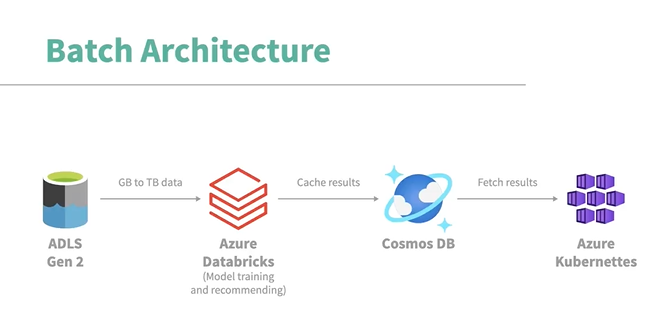

- **Advantages**:
  - Simplicity of implementation.
  - Flexibility to utilize various machine learning algorithms, irrespective of data size.
  - Fast response times for serving recommendations.

- **Disadvantages**:
  - Typically runs model computations once a day, leading to static recommendations that do not adjust to user behavior throughout the day.

---

#### 2. Real-Time Architecture
- **Description**: This architecture shares similarities with the batch architecture but is designed for immediate responsiveness.
- **Process**:
  - **Data Ingestion**: Similar data ingestion process as batch architecture.
  - **Deployment**: Instead of precomputing and storing recommendations, the machine learning model is deployed in a production cluster, loaded in memory.
  - **Real-Time Scoring**: Each time a user accesses the front end, a real-time query is made to the machine learning model, which scores recommendations instantaneously.

  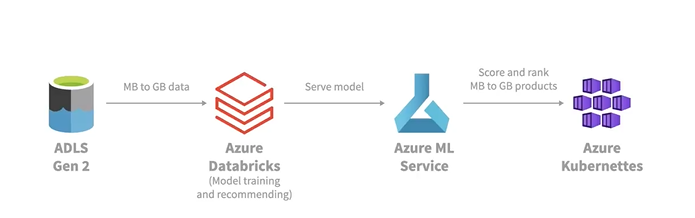

- **Advantages**:
  - Ability to adapt recommendations in real-time based on user behavior.
  
- **Disadvantages**:
  - More complex implementation compared to batch architecture.
  - Typically results in slower request times, especially if the machine learning model is complex.

---

#### 3. Hybrid Architecture
- **Description**: This architecture combines the strengths of both batch and real-time approaches, offering a balanced solution.
- **Process**:
  - **Step 1**: A heavy machine learning algorithm generates a large set of candidate items for each user (100 to 500 candidates) and stores them in a database, optimizing for recall to ensure relevant items are captured.
  - **Step 2**: A lightweight real-time algorithm reranks these candidates based on the user’s recent behavior, ensuring fast request times.

  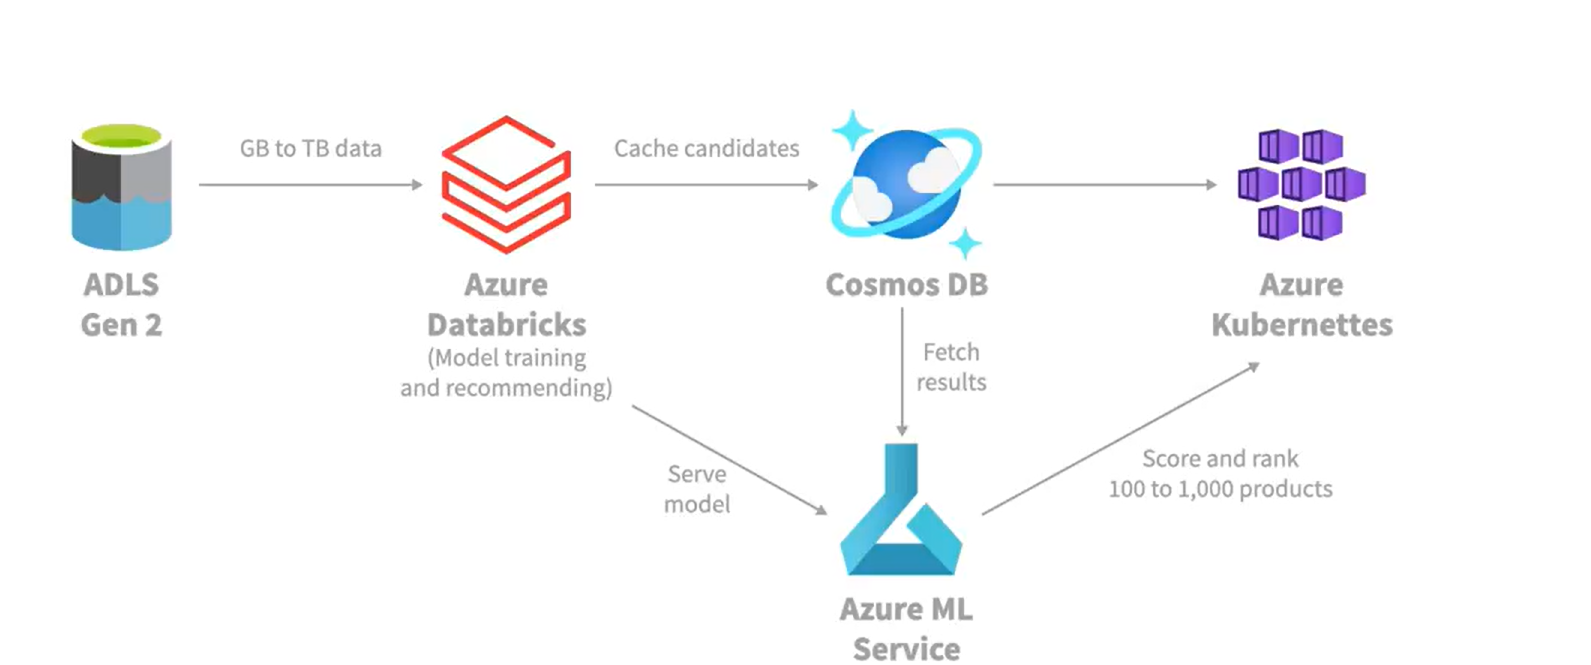


- **Advantages**:
  - Merges the comprehensive analysis of batch processing with the responsiveness of real-time systems.
  - Allows for real-time adaptation while maintaining performance efficiency.

- **Disadvantages**:
  - Increased complexity in implementation compared to using a single architecture.

---

#### Deployment Considerations
- **Initial Approach**: For new teams or projects, starting with the **Batch Architecture** is advisable due to its ease of implementation and quick request times.
- **Maturity of Solution**: As the recommendation system matures and requirements evolve, transitioning to either **Real-Time** or **Hybrid Architecture** may be warranted based on the need for dynamic recommendations and user engagement.

## Evaluation of RS in Production

#### Types of Metrics in Recommendation Systems
Recommendation systems utilize two primary categories of metrics: **offline metrics** and **online metrics**.

1. **Offline Metrics**
   - **Definition**: Mathematical metrics computed to assess the performance of machine learning models in a controlled environment (i.e., not in real-time).
   - **Types**:
     - **Ranking Metrics**: Evaluate how well the recommended items are ranked. Examples include:
       - Precision
       - Recall
       - Normalized Discounted Cumulative Gain (NDCG)
     - **Rating Metrics**: Measure the predicted ratings against actual ratings, often through Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).
     - **Diversity Metrics**: Assess how varied the recommended items are, ensuring a range of options are presented to users.

2. **Online Metrics**
   - **Definition**: Also known as business metrics, these are measured in production environments to determine the effectiveness of the model in achieving business objectives.
   - **Types**:
     - Click-through Rate (CTR): Measures the ratio of users who click on recommended items.
     - Conversion Rate: Assesses the percentage of users who complete a desired action after interacting with recommendations.
     - Monthly Active Users (MAU): Tracks the number of unique users who engage with the system within a month.
     - Average Revenue Per User (ARPU): Calculates the revenue generated per user, providing insight into financial performance.

---

#### Relationship Between Offline and Online Metrics
- **Discrepancy**: A strong performance in offline metrics (e.g., precision, recall, NDCG, or AUC) does not necessarily correlate with success in online metrics. This is a crucial consideration, as models may perform well under controlled conditions but fail to translate that success into real-world applications.
- **Solution**: To bridge the gap between offline and online performance, it is essential to conduct **A/B testing** in production environments. This involves comparing the performance of a new model against a baseline model to assess real-world efficacy.

---

#### A/B Testing Methodology
- **Process**:
  - Randomly split users into two groups (A and B).
  - Assign one group to receive recommendations from the new model and the other to receive a baseline model's recommendations.
  - Analyze the metrics from both groups to determine the new model's effectiveness.

- **Multivariate Testing**: When more than two groups are involved, it is referred to as a multivariate test.

- **Tools**: Various tools are available to facilitate traffic splitting, determine test duration based on user count, and evaluate the significance of results.

---

#### Best Practices for A/B Testing
1. **Conduct Multiple Tests**: A single A/B test may not yield significant improvements (e.g., a 30% increase in revenue). A robust pipeline for MLOps should allow for rapid experimentation and deployment.
2. **Calibrate the A/B Testing Tool**:
   - Perform an **A/A test** where the same content is sent to both groups. The expected result is no significant difference in metrics. Any notable difference indicates potential issues with the testing tool or data collection methods.
3. **Careful Experimental Design**: Avoid comparing the output of the recommendation system with no output at all. Instead, compare it against a random output to ensure meaningful evaluation.

# Test in RS

In RS, there are two primary testing workflows: **PR gates** and **nightly builds**.

In software development, there are two main testing workflows: **PR gates** and **nightly builds**.

1. **PR gates**: These are the tests run after a pull request (PR) is made. Their purpose is to check that the new code doesn’t break anything before it's merged. These tests need to be fast, ideally taking no longer than 20 to 30 minutes.

2. **Nightly builds**: These tests run asynchronously at night after the code has already been merged. They include longer tests that aren't practical to run during a PR. Since nightly builds happen after merging, errors may show up only later, after the code is integrated.

To prevent issues in the main branch, it's helpful to use a **two-level branching strategy**. In this approach, code is first merged into a staging branch, and only moved to the main branch after passing the nightly builds. This keeps the main branch stable. In contrast, if all PRs are merged directly into the main branch (a one-level strategy), there’s a risk of adding broken code if a nightly build fails.

### Types of Tests:

1. PR: **Data Validation Tests**: These check if **the input and output data match the expected format and that the data is correctly sized**. They're fast and usually run during PR gates.

2. PR: **Unit Tests**: These ensure that **individual functions or components work correctly**. They’re fast (under 30 minutes) and should run with every PR.

3. Nightly Builds: **Functional Tests**: These check **whether components do what they’re supposed to**. For example, testing if a machine learning model produces the correct output. Since they can take hours, they’re typically run in nightly builds.

4. PR/Nightly Builds: **Integration Tests**: These **check if different parts of the system (e.g., data pipelines and model training) work well together**. If they’re fast, they can run during PR gates; if not, they’re run in nightly builds.

5. Nightly Builds: **Smoke Tests**: These are quick tests run before longer tests to catch early issues. For instance, running a smaller test version to ensure everything works before running a larger, slower test. They are usually part of nightly builds and take less than 20 minutes.

6. **Performance Tests**: These measure things like how fast the code runs or how much memory it uses, to ensure everything stays within acceptable limits.

7. **Responsible AI Tests**: These ensure that the AI model follows principles like fairness, transparency, and privacy.

8. **Security Tests**: These check the code for vulnerabilities that might be exploited by attackers. This includes checking both external packages and the operating system.

9. **Regression Tests**: These tests make sure that when you upgrade or change the code, it still works as expected. For example, when moving from one version of a library to another, regression tests help ensure that the system still functions correctly.

# The ML Lifecycle

Before starting any coding, the first priority is to clearly define the **business objective** and review all **dependencies**.

The business objective specifies the measurable value your work will provide, such as increasing the conversion rate by 10% or improving monthly active usage by 1%. Always remember, success is measured by the value you create, not the complexity of the system you build.

Next, assess the **technical dependencies**. These include:
- **Access to data**: Do you have the necessary usage data for your recommendation system?
- **Compute resources**: Can you perform experiments on the available infrastructure?
- **Deployment capabilities**: Is there a system in place to deploy your solution and deliver recommendations to the front end?
- **Impact measurement**: Can you track the effect of your recommendation system?

Equally important are the **human dependencies**. These refer to the people and teams you depend on. Ensure that they are aligned with your project’s goals, as one common mistake engineers make is building a system that never gets used.

### Step-by-Step Approach:
1. **Start Simple**: Your first recommender should be minimalistic—think of a basic **Gradient Boosting Machine (GBM)** model. While many would spend weeks building data pipelines and experimenting with different algorithms, a better strategy is to work in **end-to-end iterations**. Build a complete, simple version of the system that covers everything from data pipeline to deployment.
   - **First Recommender**: Set up a basic data pipeline, create simple features, and use GBM on a subset of the data if it’s too large.
   - **Deploy using batch architecture** and **A/B test** the system—one group sees your recommendations, the other sees random ones. This first version should be in production in under a week, allowing you to learn quickly.

2. **Build an ML Lifecycle**: After the initial version, focus on establishing a solid **machine learning lifecycle**. Test and validate your data pipeline and deployment processes. Develop Python utilities to support your experiments and code, using **Jupyter Notebooks** for experimentation but **not for deployment**—instead, extract the useful parts and convert them into production-ready scripts.
   - Aim for a system that runs daily with minimal errors. This strong ML foundation allows you to test new algorithms and changes swiftly.

3. **Experiment with New Algorithms**: Once the lifecycle is stable, try more advanced models. **SAR (Smart Adaptive Recommendations)** is an excellent choice if you have large amounts of usage data. After deploying SAR, you can explore other algorithms, referring to repositories of various recommendation system algorithms.
   - Continue improving the **data pipeline** and **deployment architecture** as you iterate.

### Iterative Process:
The key to success is working in iterations:
- **Version 1**: A simple end-to-end recommender system, quickly deployed to generate value.
- **Version 2**: A complete ML operations framework that supports fast experimentation and reliable deployments.
- **Version 3 and beyond**: Experimenting with different algorithms, improving pipelines, and refining architectures.

By continuously iterating, you can deliver measurable business value from the early stages while setting up a system that scales and improves over time.